# Analysis of WHO data of prevalence of e-cigarette use in adults and adolescents
---

In [10]:
# Import Dependencies
import json
import requests
from pprint import pprint
import pandas as pd
from pathlib import Path
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt

# Search for indicator names by filter, referring to https://www.who.int/data/gho/info/gho-odata-api documentation
ecig_response = requests.get("https://ghoapi.azureedge.net/api/Indicator?$filter=contains(IndicatorName,'e-cig')").json()
print('Datasets related to e-cigarettes:')
print('-----------------------------------------------------')
ecig_response
# Then read through and find datasets related to e-cigarettes

Datasets related to e-cigarettes:
-----------------------------------------------------


{'@odata.context': 'https://ghoapi.azureedge.net/api/$metadata#Indicator',
 'value': [{'IndicatorCode': 'Adult_curr_e-cig',
   'IndicatorName': 'Prevalence of current e-cigarette use among adults (%)',
   'Language': 'EN'},
  {'IndicatorCode': 'Yth_curr_e-cig',
   'IndicatorName': 'Prevalence of current e-cigarette use among adolescents (%)',
   'Language': 'EN'},
  {'IndicatorCode': 'Adult_daily_e-cig',
   'IndicatorName': 'Prevalence of daily e-cigarette use among adults (%)',
   'Language': 'EN'},
  {'IndicatorCode': 'Yth_daily_e-cig',
   'IndicatorName': 'Prevalence of daily e-cigarette use among adolescents (%)',
   'Language': 'EN'}]}

## Adult current e-cigarette use

Prevalence of adult e-cigarette use
Datasource: World Health Organisation
(Data collected between 2013 and 2022)


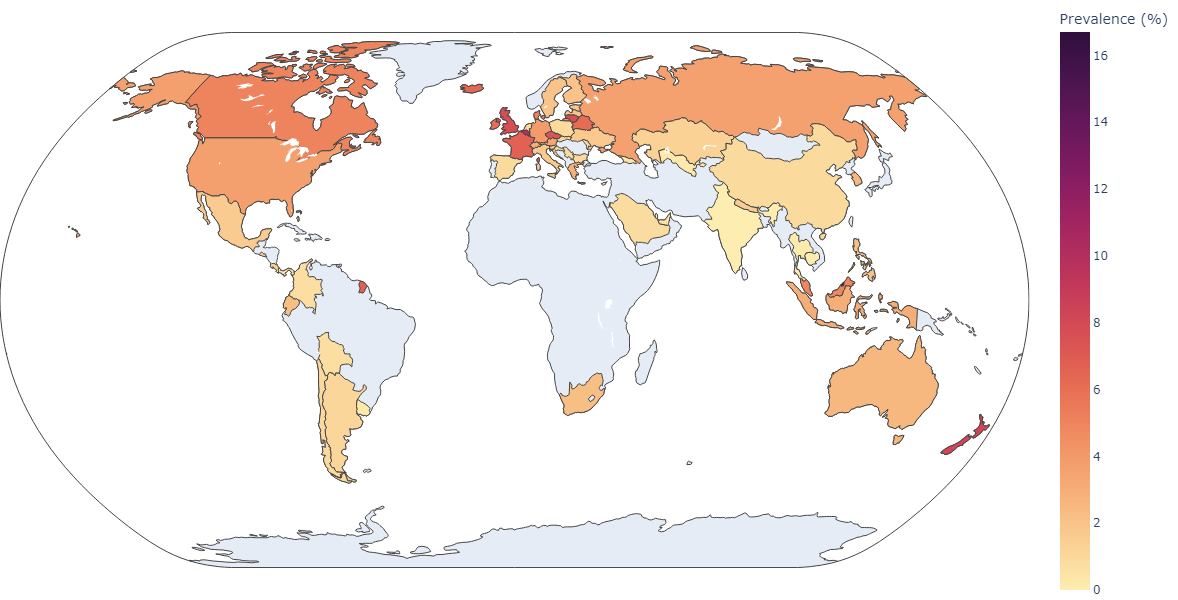

In [11]:
# https://www.who.int/data/gho/info/gho-odata-api
base_url = 'https://ghoapi.azureedge.net/api/'
indicator_name = 'Adult_curr_e-cig'

response1 = requests.get(base_url + indicator_name)

# Get data in json format
adult_curr_ecig = response1.json()

# Search for keys (visual inspection showed dictionary datatype)
adult_curr_ecig.keys()

# Get all data in 'value' key
adult_curr_ecig_data = adult_curr_ecig['value']

# Turn data into dataframe
# Show all columns
# https://saturncloud.io/blog/python-spyder-display-all-columns-of-a-pandas-dataframe-in-describe/#:~:text=To%20display%20all%20columns%2C%20you,there%20are%20in%20the%20DataFrame.&text=Now%2C%20when%20you%20use%20the,all%20columns%20will%20be%20displayed.
pd.set_option('display.max_columns', None)

adult_curr_ecig_df = pd.DataFrame(adult_curr_ecig_data)

# Remove NaN values in NumericValue column - want to filter out any rows that have no e-cigarette use recorded
adult_curr_ecig_df_clean = adult_curr_ecig_df[adult_curr_ecig_df['NumericValue'].notna()]

# sort values then select specific columns and rename them
adult_curr_ecig_df_clean.sort_values(['SpatialDim', 'Dim1', 'TimeDim']).head(10)
adult_curr_ecig_df_clean2 = adult_curr_ecig_df_clean[['IndicatorCode','SpatialDim','ParentLocation','Dim1','TimeDim','NumericValue']]
adult_curr_ecig_df_rename = adult_curr_ecig_df_clean2.rename(columns={'SpatialDim':'Country',
                                                                      'ParentLocation' : 'Region',
                                                                      'Dim1': 'Sex',
                                                                      'TimeDim':'Year',
                                                                      'NumericValue':'Prevalence (%)'                                                                   
                                                                      })

# Rename Sex categories to be more meaningful
# https://www.quora.com/How-do-you-delete-quotes-and-double-quotes-from-DataFrame-Python-regex-pandas-dataframe-development
adult_curr_ecig_df_rename['Sex'] = adult_curr_ecig_df_rename['Sex'].replace({'SEX_BTSX': 'Overall'}, regex=True)
adult_curr_ecig_df_rename['Sex'] = adult_curr_ecig_df_rename['Sex'].replace({'SEX_MLE': 'Male'}, regex=True)
adult_curr_ecig_df_rename['Sex'] = adult_curr_ecig_df_rename['Sex'].replace({'SEX_FMLE': 'Female'}, regex=True)

# Filter for overall only
adult_ecig_overall = adult_curr_ecig_df_rename.loc[(adult_curr_ecig_df_rename['Sex']=='Overall')]

# Get min/max of Year
min_yr_adult = adult_ecig_overall['Year'].min()
max_yr_adult = adult_ecig_overall['Year'].max()
max_adult_ecig = adult_ecig_overall['Prevalence (%)'].max()
max_adult_ecig_country = adult_ecig_overall['Country'].loc[(adult_ecig_overall['Prevalence (%)']==max_adult_ecig)]
# print(f"{max_adult_ecig_country} {max_adult_ecig}%")

# Adult e-cigarette prevalence map plot
# https://plotly.com/python/choropleth-maps/
import plotly.express as px

fig = px.choropleth(adult_ecig_overall, locations="Country",
                    color="Prevalence (%)", 
                    hover_data = ['Country','Region','Prevalence (%)'],
                    color_continuous_scale=px.colors.sequential.matter,
                    projection='natural earth'
                    # title='Countries with recorded adult e-cigarette use in 2019'
                    )
# https://stackoverflow.com/questions/63466163/how-to-enlarge-geographic-map-in-python-plotly-choropleth-plot
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=600)
print('Prevalence of adult e-cigarette use')
print('Datasource: World Health Organisation')
print(f"(Data collected between {min_yr_adult} and {max_yr_adult})")

fig.show()

## Adolescent current e-cigarette use

Prevalence of adolescent e-cigarette use
Datasource: World Health Organisation
Data collected between 2014 and 2022


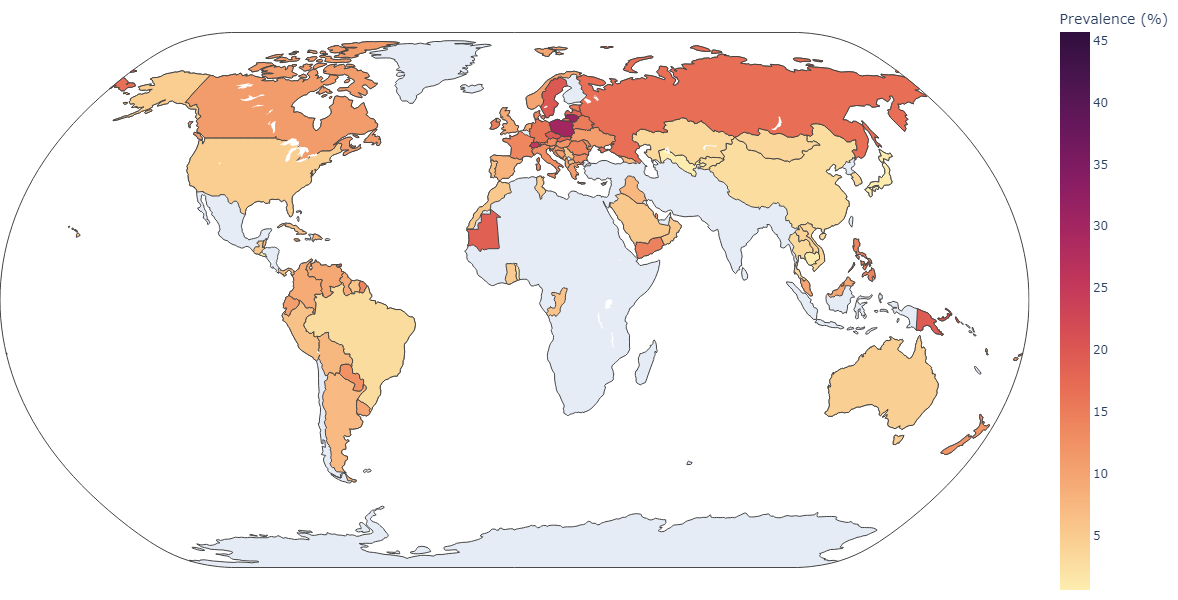

In [12]:
# Pull in youth data - current
indicator_name2 = 'Yth_curr_e-cig'
response2 = requests.get(base_url + indicator_name2)

# Get data in json format
yth_curr_ecig = response2.json()

# Get data and create dataframe
yth_curr_ecig_data = yth_curr_ecig['value']
yth_curr_ecig_df = pd.DataFrame(yth_curr_ecig_data)

# Remove NaN
yth_curr_ecig_df_clean = yth_curr_ecig_df[yth_curr_ecig_df['NumericValue'].notna()]

# sort values then select specific columns and rename them
yth_curr_ecig_df_clean.sort_values(['SpatialDim', 'Dim1', 'TimeDim']).head(10)
yth_curr_ecig_df_clean2 = yth_curr_ecig_df_clean[['IndicatorCode','SpatialDim','ParentLocation','Dim1','TimeDim','NumericValue']]
yth_curr_ecig_df_rename = yth_curr_ecig_df_clean2.rename(columns={'SpatialDim':'Country',
                                                                  'ParentLocation' : 'Region',
                                                                  'Dim1': 'Sex',
                                                                  'TimeDim':'Year',
                                                                  'NumericValue':'Prevalence (%)'                                                                   
                                                                  })

# https://www.quora.com/How-do-you-delete-quotes-and-double-quotes-from-DataFrame-Python-regex-pandas-dataframe-development
yth_curr_ecig_df_rename['Sex'] = yth_curr_ecig_df_rename['Sex'].replace({'SEX_BTSX': 'Overall'}, regex=True)
yth_curr_ecig_df_rename['Sex'] = yth_curr_ecig_df_rename['Sex'].replace({'SEX_MLE': 'Male'}, regex=True)
yth_curr_ecig_df_rename['Sex'] = yth_curr_ecig_df_rename['Sex'].replace({'SEX_FMLE': 'Female'}, regex=True)

# Get overall by Sex only
yth_ecig_overall = yth_curr_ecig_df_rename.loc[(yth_curr_ecig_df_rename['Sex']=='Overall')]

# Get min/max of Year
min_yr_youth = yth_ecig_overall['Year'].min()
max_yr_youth = yth_ecig_overall['Year'].max()
max_prevalence_yth = yth_ecig_overall['Prevalence (%)'].max()
max_prevalence_yth_country = yth_ecig_overall['Country'].loc[(yth_ecig_overall['Prevalence (%)']==max_prevalence_yth)]
# print(f"{max_prevalence_yth_country} {max_prevalence_yth}%")

# Youth e-cigarette prevalence map plot
import plotly.express as px

fig = px.choropleth(yth_ecig_overall, locations="Country",
                    color="Prevalence (%)", 
                    hover_data = ['Country','Region','Prevalence (%)'],
                    color_continuous_scale=px.colors.sequential.matter,
                    projection='natural earth'
                    # title='Countries with recorded adult e-cigarette use in 2019'
                    )
# https://stackoverflow.com/questions/63466163/how-to-enlarge-geographic-map-in-python-plotly-choropleth-plot
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  width=1200, 
                  height=600)
print('Prevalence of adolescent e-cigarette use')
print('Datasource: World Health Organisation')
print(f"Data collected between {min_yr_youth} and {max_yr_youth}")

fig.show()

## Adult daily e-cigarette use

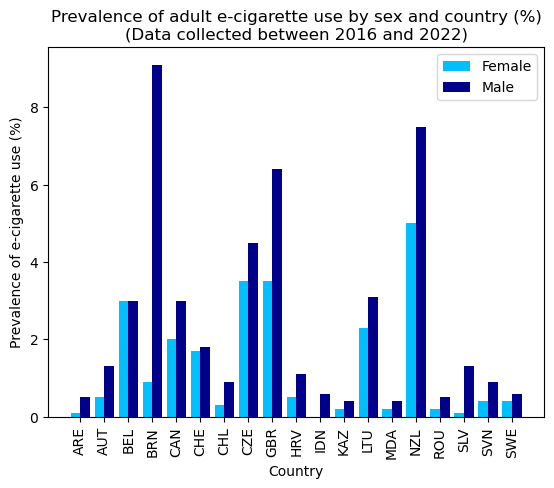

In [13]:
# Pull in adult data - daily
indicator_name3 = 'Adult_daily_e-cig'
response3 = requests.get(base_url + indicator_name3)

# Get data in json format
adult_dly_ecig = response3.json()

# Get data and create dataframe
adult_dly_ecig_data = adult_dly_ecig['value']
adult_dly_ecig_df = pd.DataFrame(adult_dly_ecig_data)

# Remove all rows with NaN in Prevalence column
adult_dly_ecig_df_clean = adult_dly_ecig_df[adult_dly_ecig_df['NumericValue'].notna()]

# Rename columns
adult_dly_ecig_df_rename = adult_dly_ecig_df_clean.rename(columns={'SpatialDim':'Country',
                                                                   'ParentLocation' : 'Region',
                                                                   'Dim1': 'Sex',
                                                                   'TimeDim':'Year',
                                                                   'NumericValue':'Prevalence (%)'                                                                   
                                                                  })         

# Give more intuitive labels for Sex
adult_dly_ecig_df_rename['Sex'] = adult_dly_ecig_df_rename['Sex'].replace({'SEX_BTSX': 'Overall'}, regex=True)
adult_dly_ecig_df_rename['Sex'] = adult_dly_ecig_df_rename['Sex'].replace({'SEX_MLE': 'Male'}, regex=True)
adult_dly_ecig_df_rename['Sex'] = adult_dly_ecig_df_rename['Sex'].replace({'SEX_FMLE': 'Female'}, regex=True)

# group by country code, get number of observations of each
adult_dly_ecig_group = adult_dly_ecig_df_rename.groupby(['Country']).size()
adult_dly_ecig_df = pd.DataFrame(adult_dly_ecig_group)
adult_dly_ecig_df = adult_dly_ecig_df.rename(columns={0: "CountObs"})

# Merge number of observations back onto original clean dataframe
adult_dly_ecig_df_merge = pd.merge(adult_dly_ecig_df_rename,adult_dly_ecig_df, on='Country', how='left')

adult_dly_ecig_df_merge2 = adult_dly_ecig_df_merge.sort_values(['Country'])

# Get male and female observations only, sort again by country code and year
adult_dly_ecig_M_F = adult_dly_ecig_df_merge2.loc[(adult_dly_ecig_df_merge2['Sex'] != 'Overall')]
adult_dly_ecig_M_F2 = adult_dly_ecig_M_F.sort_values(['Country','Sex'])

# Only get countries where there are all observations
adult_dly_ecig_all = adult_dly_ecig_M_F2.loc[(adult_dly_ecig_M_F2['CountObs']==3)]

# Get min and max for data collection years
min_year_adult_dly = adult_dly_ecig_all['Year'].min()
max_year_adult_dly = adult_dly_ecig_all['Year'].max()

# Create lists ready for side by side bar plot data
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
Countries = list(adult_dly_ecig_all['Country'].unique())

Female_data = list(adult_dly_ecig_all['Prevalence (%)'].loc[(adult_dly_ecig_all['Sex']=='Female')])

Male_data = list(adult_dly_ecig_all['Prevalence (%)'].loc[(adult_dly_ecig_all['Sex']=='Male')])

# print(f"{max(Male_data)}, {max(Female_data)}")

# Create dataframe for side by side barplot
M_F_adult_dly_prevalence = pd.DataFrame({'Country': Countries,
                                        'Female': Female_data,
                                        'Male': Male_data,
                                        })

# Plot a grouped bar chart
# https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
x = np.arange(len(Countries))
width = 0.40
plt.bar(x-0.2, Female_data, width, color='deepskyblue')
plt.bar(x+0.2, Male_data, width, color='darkblue')
plt.xticks(x, Countries, rotation=90)
plt.xlabel('Country')
plt.ylabel('Prevalence of e-cigarette use (%)')
plt.title(f"Prevalence of adult e-cigarette use by sex and country (%)\n(Data collected between {min_year_adult_dly} and {max_year_adult_dly})")
plt.legend(["Female", "Male"]) 

plt.savefig('../Output_Files/WHO_adult_curr_use.png')

plt.show()

## Adolescent daily e-cigarette use

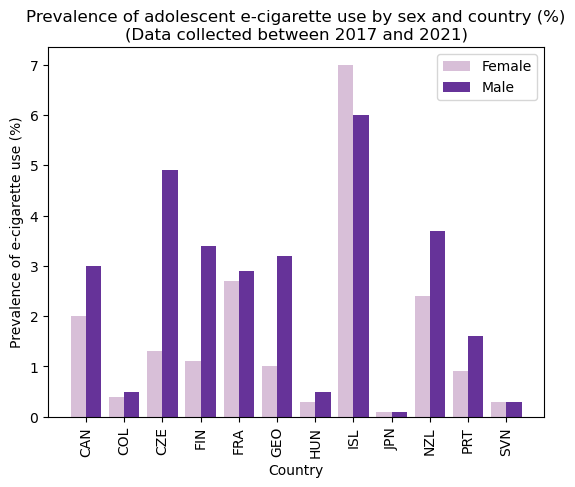

In [14]:
# Pull in youth data - daily
indicator_name4 = 'Yth_daily_e-cig'
response4 = requests.get(base_url + indicator_name4)

# Get data in json format
yth_dly_ecig = response4.json()

# Get data and create dataframe
yth_dly_ecig_data = yth_dly_ecig['value']
yth_dly_ecig_df = pd.DataFrame(yth_dly_ecig_data)

# Remove all rows with NaN in Prevalence column
yth_dly_ecig_df_clean = yth_dly_ecig_df[yth_dly_ecig_df['NumericValue'].notna()]

# Rename columns
yth_dly_ecig_df_rename = yth_dly_ecig_df_clean.rename(columns={'SpatialDim':'Country',
                                                               'ParentLocation' : 'Region',
                                                               'Dim1': 'Sex',
                                                               'TimeDim':'Year',
                                                               'NumericValue':'Prevalence (%)'                                                                   
                                                              })         

# Give more intuitive labels for Sex
yth_dly_ecig_df_rename['Sex'] = yth_dly_ecig_df_rename['Sex'].replace({'SEX_BTSX': 'Overall'}, regex=True)
yth_dly_ecig_df_rename['Sex'] = yth_dly_ecig_df_rename['Sex'].replace({'SEX_MLE': 'Male'}, regex=True)
yth_dly_ecig_df_rename['Sex'] = yth_dly_ecig_df_rename['Sex'].replace({'SEX_FMLE': 'Female'}, regex=True)

# group by country code, get number of observations of each
yth_dly_ecig_group = yth_dly_ecig_df_rename.groupby(['Country']).size()
yth_dly_ecig_df = pd.DataFrame(yth_dly_ecig_group)
yth_dly_ecig_df = yth_dly_ecig_df.rename(columns={0: "CountObs"})

# Merge number of observations back onto original clean dataframe
yth_dly_ecig_df_merge = pd.merge(yth_dly_ecig_df_rename,yth_dly_ecig_df, on='Country', how='left')

yth_dly_ecig_df_merge2 = yth_dly_ecig_df_merge.sort_values(['Country'])

# Get male and female observations only, sort again by country code and year
yth_dly_ecig_M_F = yth_dly_ecig_df_merge2.loc[(yth_dly_ecig_df_merge2['Sex'] != 'Overall')]
yth_dly_ecig_M_F2 = yth_dly_ecig_M_F.sort_values(['Country','Sex'])

# Only get countries where there are all observations
yth_dly_ecig_all = yth_dly_ecig_M_F2.loc[(yth_dly_ecig_M_F2['CountObs']==3)]

# Get min and max for data collection years
min_year_yth_dly = yth_dly_ecig_all['Year'].min()
max_year_yth_dly = yth_dly_ecig_all['Year'].max()

# Create lists ready for side by side bar plot data
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
Countries = list(yth_dly_ecig_all['Country'].unique())

Female_data = list(yth_dly_ecig_all['Prevalence (%)'].loc[(yth_dly_ecig_all['Sex']=='Female')])

Male_data = list(yth_dly_ecig_all['Prevalence (%)'].loc[(yth_dly_ecig_all['Sex']=='Male')])

# print(f"{max(Male_data)}, {max(Female_data)}")

# Create dataframe for side by side barplot
M_F_yth_dly_prevalence = pd.DataFrame({'Country': Countries,
                                        'Female': Female_data,
                                        'Male': Male_data,
                                        })

# Plot a grouped bar chart
# https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/
x = np.arange(len(Countries))
width = 0.40
plt.bar(x-0.2, Female_data, width, color='thistle')
plt.bar(x+0.2, Male_data, width, color='rebeccapurple')
plt.xticks(x, Countries, rotation=90)
plt.xlabel('Country')
plt.ylabel('Prevalence of e-cigarette use (%)')
plt.title(f"Prevalence of adolescent e-cigarette use by sex and country (%)\n(Data collected between {min_year_yth_dly} and {max_year_yth_dly})")
plt.legend(["Female", "Male"]) 

plt.savefig('../Output_Files/WHO_youth_curr_use.png')

plt.show()